In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read data
df=pd.read_csv('data/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# select our target
y = df.iloc[:,13]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [5]:
#select our label/features
X = df.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


<AxesSubplot:xlabel='Exited', ylabel='count'>

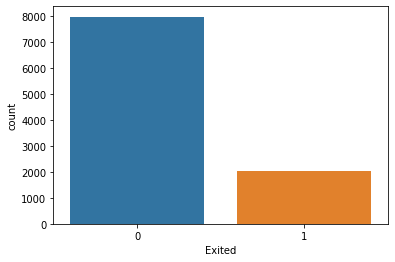

In [6]:
sns.countplot(y)

<AxesSubplot:xlabel='Geography', ylabel='count'>

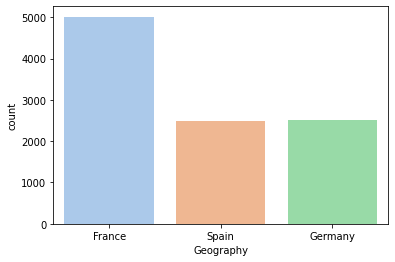

In [10]:
sns.countplot(X['Geography'], palette='pastel')

In [25]:
df['Gender'].value_counts()


Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='Exited'>

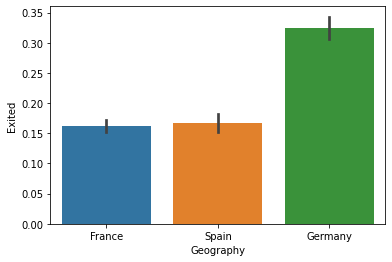

In [31]:
sns.barplot(x='Geography', y='Exited', data=df)

<AxesSubplot:xlabel='Gender', ylabel='Exited'>

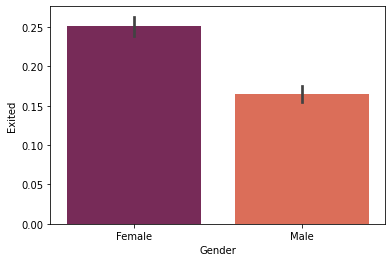

In [33]:
sns.barplot(x='Gender', y='Exited', data=df, palette='rocket')

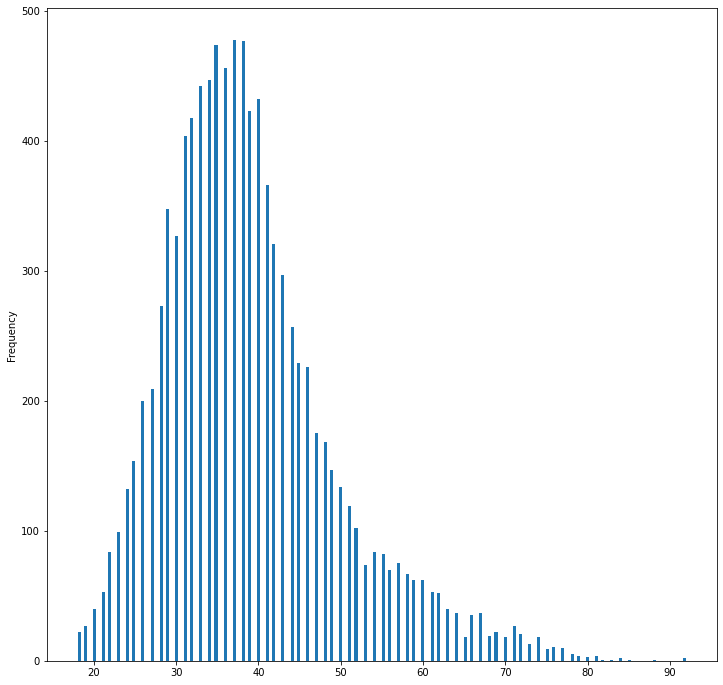

In [34]:
df.Age.plot(kind='hist', bins=200, figsize=(12,12))
plt.show()

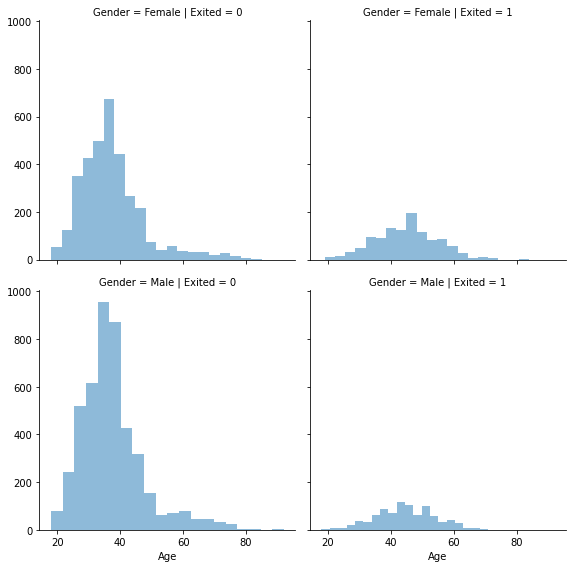

In [35]:
g = sns.FacetGrid(df, row='Gender', col ='Exited', height=4)
g.map(plt.hist,'Age', alpha=0.5, bins=20)
g.add_legend()
plt.show()

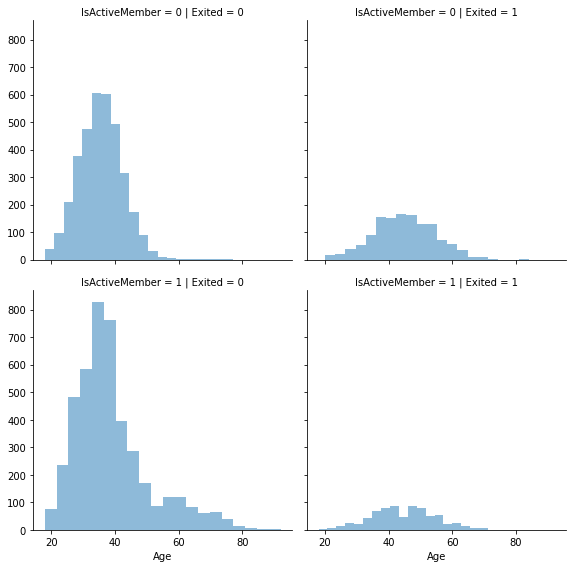

In [36]:
g = sns.FacetGrid(df, row='IsActiveMember', col ='Exited', height=4)
g.map(plt.hist,'Age', alpha=0.5, bins=20)
g.add_legend()
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
print(X['Gender'].head(7))

0    0
1    0
2    0
3    0
4    0
5    1
6    1
Name: Gender, dtype: int32


In [40]:
X['Geography'] = label.fit_transform(X['Geography'])
print(X['Geography'].head())

0    0
1    2
2    0
3    0
4    2
Name: Geography, dtype: int64


In [41]:
X['Geography'].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
pd.get_dummies(X)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=42)

In [ ]:
sc_X=StandardScaler()
X_train=sc_x.fit_transform(X_tr)